In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City Data
city_data = pd.read_csv(city_data_to_load)
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
# Read the Ride Data
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Combine the rider and city date on column "city"
driver_and_rider = pd.merge(ride_data,city_data,on = "city", how = "outer")
driver_and_rider.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [4]:
# Group the merged data by "type" and "city"
grp_type_city = driver_and_rider.groupby(["type","city"])

# Get the mean value of the "fare"
average_fare = grp_type_city["fare"].mean()

# Save the mean fare of rural, suburban, and urban seperately 
rural_fare = average_fare.loc["Rural"]
suburban_fare = average_fare.loc["Suburban"]
urban_fare = average_fare.loc["Urban"]

In [5]:
# Get the total count of column "city" as the number of rides
total_rides = grp_type_city["city"].count()

# Save the total rides of rural, suburban, and urban seperately 
rural_rides = total_rides.loc["Rural"]
suburban_rides = total_rides.loc["Suburban"]
urban_rides = total_rides.loc["Urban"]


In [6]:
# Get the mean value of the "driver_count", which is the number of drivers of each city
total_driver = grp_type_city["driver_count"].mean()

# Save the driver number of rural, suburban, and urban seperately 
rural_driver = total_driver.loc["Rural"]
suburban_driver = total_driver.loc["Suburban"]
urban_driver = total_driver.loc["Urban"]

In [7]:
# Merge the "mean fare" with "rides number" for each city type
rural = pd.merge(rural_fare,rural_rides, left_index = True, right_index = True,how= "outer").rename(columns={"city": "rides"})
suburban = pd.merge(suburban_fare,suburban_rides, left_index = True, right_index = True,how= "outer").rename(columns={"city": "rides"})
urban = pd.merge(urban_fare,urban_rides, left_index = True, right_index = True,how= "outer").rename(columns={"city": "rides"})

In [8]:
# Merge the resulting table of last step with "driver number" for each city type
# So, for each city type, there is a city list including the "mean fare", "number of rides" and "number of drivers" for each city
rural = pd.merge(rural,rural_driver, left_index = True, right_index = True,how= "outer") 
suburban = pd.merge(suburban,suburban_driver, left_index = True, right_index = True,how= "outer")
urban = pd.merge(urban,urban_driver, left_index = True, right_index = True,how= "outer")
urban.head()

,fare,rides,driver_count
city,,,
Amandaburgh,24.641667,18,12
Barajasview,25.332273,22,26
Carriemouth,28.314444,27,52
Christopherfurt,24.501852,27,41
Deanville,25.842632,19,49


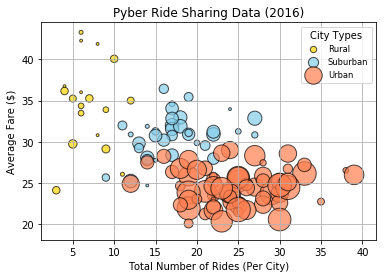

In [9]:
# Plot one scatter graph for each city type with column "rides" as x value and column "fare" as y value
# and column "driver_count" as the size
# Show 3 graphs in one figure
ax= rural.plot(kind='scatter', x='rides', y='fare',color='gold',alpha=0.7,edgecolors="black",label="Rural",s= rural['driver_count']*8)
suburban.plot(kind='scatter', x='rides', y='fare',color='skyblue',alpha=0.7,ax=ax,edgecolors="black",label="Suburban",s= suburban['driver_count']*8)
urban.plot(kind='scatter', x='rides', y='fare',color='coral',alpha=0.7,ax=ax,edgecolors="black",label="Urban",s= urban['driver_count']*8)

# Set grid, labels, tible and legend
plt.grid()
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend(fontsize='small',title = "City Types")

# Save Figure
plt.savefig("Images/PyberRideSharingData.png")

In [10]:
# Total Fares by City Type
# Calculate total fares
total_fare = driver_and_rider["fare"].sum()

# Calculate Type Percents
grp_type= driver_and_rider.groupby(["type"])
fare_per_type = grp_type["fare"].sum()/total_fare
fare_per_type

type
Rural       0.068115
Suburban    0.304639
Urban       0.627246
Name: fare, dtype: float64

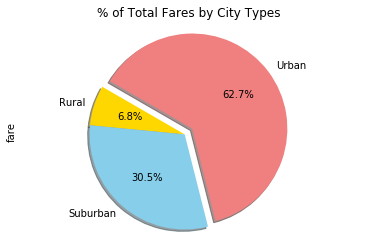

In [11]:
# Build Pie Chart
explode = (0,0,0.1)     
colors = ["gold","skyblue","lightcoral"]
fare_per_type.plot(kind = "pie",explode=explode, colors=colors,title="% of Total Fares by City Types",shadow = True,autopct="%1.1f%%",startangle=150)
plt.axis("equal")

# Save Figure
plt.savefig("Images/Pyber_TotalFaresByCityType.png")

In [12]:
# Total Rides by City Type
# Calculate total rides
total_rides = driver_and_rider["ride_id"].count()

# Calculate Type Percents
grp_type= driver_and_rider.groupby(["type"])
ride_per_type = grp_type["ride_id"].count()/total_rides
ride_per_type

type
Rural       0.052632
Suburban    0.263158
Urban       0.684211
Name: ride_id, dtype: float64

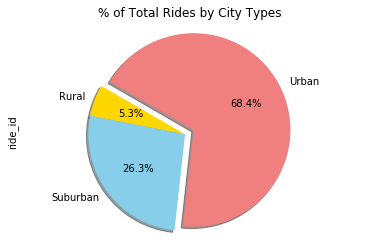

In [13]:
# Build Pie Chart
explode = (0,0,0.1)     
colors = ["gold","skyblue","lightcoral"]
ride_per_type.plot(kind = "pie",explode=explode, colors=colors,title="% of Total Rides by City Types",shadow = True,autopct="%1.1f%%",startangle=150)
plt.axis("equal")

# Save Figure
plt.savefig("Images/Pyber_TotalRidesByCityType.png")

In [14]:
# Total Drivers by City Type
# Calculate total drivers
total_drivers = city_data["driver_count"].sum()

# Calculate Type Percents
grp_type= city_data.groupby(["type"])
driver_per_type = grp_type["driver_count"].sum()/total_drivers
driver_per_type

type
Rural       0.026236
Suburban    0.164817
Urban       0.808947
Name: driver_count, dtype: float64

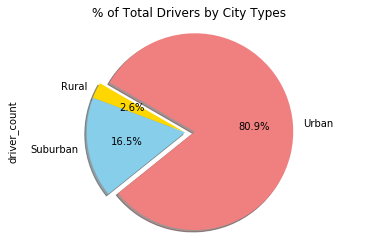

In [16]:
# Build Pie Chart
explode = (0,0,0.1)     
colors = ["gold","skyblue","lightcoral"]
driver_per_type.plot(kind = "pie",explode=explode, colors=colors,title="% of Total Drivers by City Types",shadow = True,autopct="%1.1f%%",startangle=150)
plt.axis("equal")

# Save Figure
plt.savefig("Images/Pyber_TotalDriversByCityType.png")